## Multy Layer Perceptron

In [11]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, subplots, savefig, show
from sklearn.neural_network import MLPClassifier
from libs.ds_charts import plot_evaluation_results, multiple_line_chart, horizontal_bar_chart, HEIGHT
from sklearn.metrics import accuracy_score

In [12]:
### FILES
file_tag_zscore = 'nyc_collisions_scaled_zscore'
filename_zscore = 'data/nyc_collisions_scaled_zscore'

file_tag_minmax = 'nyc_collisions_scaled_minmax'
filename_minmax = 'data/nyc_collisions_scaled_minmax'

target = 'PERSON_INJURY'

/opt/anaconda3/envs/IST_DL21_Env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/IST_DL21_Env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/IST_DL21_Env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


FileNotFoundError: [Errno 2] No such file or directory: 'lab7_images/data/nyc_collisions_scaled_zscore_mlp_study.png'

<Figure size 600x450 with 0 Axes>

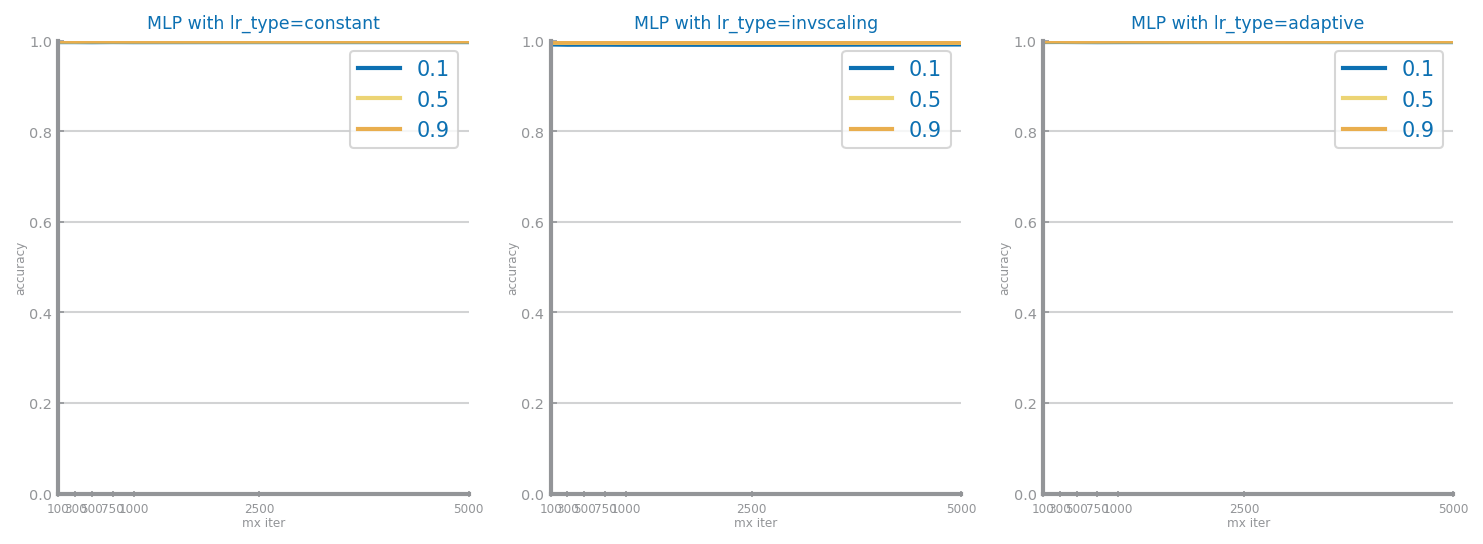

In [13]:
# ja separamos anteriormente entre train e test!

train: DataFrame = read_csv(f'{filename_zscore}_train_smote.csv')
trnY: ndarray = train.pop(target).values
trnX: ndarray = train.values
labels = unique(trnY)
labels.sort()

test: DataFrame = read_csv(f'{filename_zscore}_test.csv')
tstY: ndarray = test.pop(target).values
tstX: ndarray = test.values

lr_type = ['constant', 'invscaling', 'adaptive']
max_iter = [100, 300, 500, 750, 1000, 2500, 5000]
learning_rate = [.1, .5, .9]
best = ('', 0, 0)
last_best = 0
best_model = None

cols = len(lr_type)
figure()
fig, axs = subplots(1, cols, figsize=(cols*HEIGHT, HEIGHT), squeeze=False)
for k in range(len(lr_type)):
    d = lr_type[k]
    values = {}
    for lr in learning_rate:
        yvalues = []
        for n in max_iter:
            mlp = MLPClassifier(activation='logistic', solver='sgd', learning_rate=d,
                                learning_rate_init=lr, max_iter=n, verbose=False)
            mlp.fit(trnX, trnY)
            prdY = mlp.predict(tstX)
            yvalues.append(accuracy_score(tstY, prdY))
            if yvalues[-1] > last_best:
                best = (d, lr, n)
                last_best = yvalues[-1]
                best_model = mlp
        values[lr] = yvalues
    multiple_line_chart(max_iter, values, ax=axs[0, k], title=f'MLP with lr_type={d}',
                           xlabel='mx iter', ylabel='accuracy', percentage=True)
savefig(f'lab7_images/nyc_collisions_scaled_zscore_smote_mlp_study.png')
show()
print(f'Best results with lr_type={best[0]}, learning rate={best[1]} and {best[2]} max iter, with accuracy={last_best}')

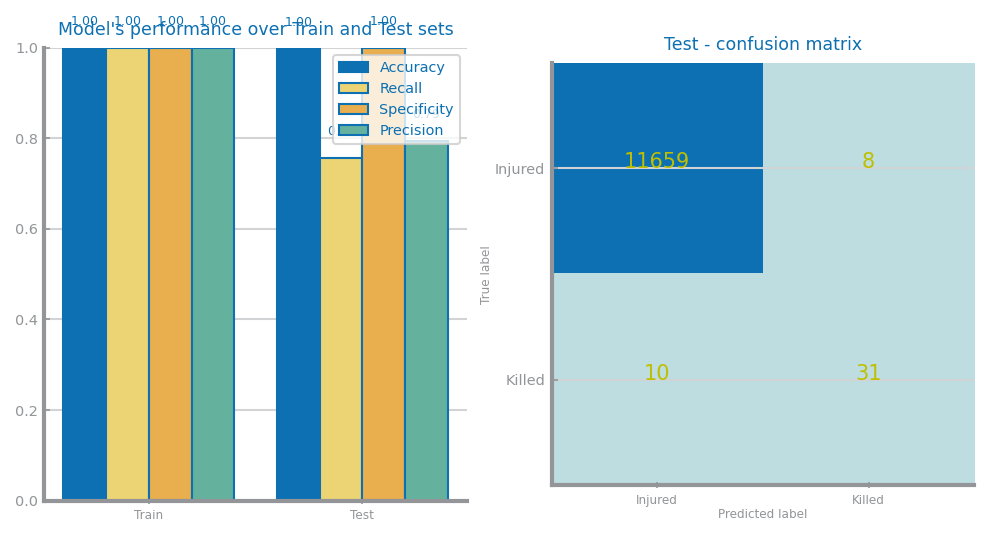

In [14]:
prd_trn = best_model.predict(trnX)
prd_tst = best_model.predict(tstX)
plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
savefig(f'lab7_images/nyc_collisions_scaled_zscore_smote_mlp_best.png')
show()

In [17]:
from libs.ds_charts import plot_overfitting_study

lr_type = 'adaptive'
lr = 0.9
eval_metric = accuracy_score
y_tst_values = []
y_trn_values = []
for n in max_iter:
    mlp = MLPClassifier(activation='logistic', solver='sgd', learning_rate=lr_type, learning_rate_init=lr, max_iter=n, verbose=False)
    mlp.fit(trnX, trnY)
    prd_tst_Y = mlp.predict(tstX)
    prd_trn_Y = mlp.predict(trnX)
    y_tst_values.append(eval_metric(tstY, prd_tst_Y))
    y_trn_values.append(eval_metric(trnY, prd_trn_Y))
plot_overfitting_study(max_iter, y_trn_values, y_tst_values, name=f'NN_lr_type={lr_type}_lr={lr}', xlabel='nr episodes', ylabel=str(eval_metric))

ModuleNotFoundError: No module named 'ds_charts'